# Tree-based Models


---


[documentação](https://scikit-learn.org/stable/index.html) <br>
dataset: [fonte](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv)

---

>[Tree-based Models](#scrollTo=QoBv84MIUa-h)

>>[1.  árvore de decisão](#scrollTo=_78JL1jFVQST)

>>>[1.1. Vamos começar por importar os packages e o dataset](#scrollTo=nMdkJ3j2VpA7)

>>>[1.2. Vamos dividir em treino e teste com a ajuda do scikit-learn](#scrollTo=ZR02Gy4cWaOa)

>>>[1.3. Vamos aplicar os modelos de KNN e de regressão logística](#scrollTo=TNNDd9mFWPWU)

>>>[1.4. Vamos aplicar o modelo de árvores de decisão](#scrollTo=6EomhJIfWBRm)

>>[2.  random forest](#scrollTo=XlbazW6NVk7-)

>>>[2.1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>>[2.2. Vamos visualizar a informação](#scrollTo=lYnaR0LYO-Sg)

>>>[2.3. Vamos aplicar o modelo de regressão](#scrollTo=BKzodGb8R7t9)

>>>[2.4. Vamos aplicar o modelo de random forest](#scrollTo=4CJL3vzRZ88m)

>>>[2.6. Vamos visualizar os resultados](#scrollTo=CHXILGvX9XQY)



## 1.&nbsp; árvore de decisão

### 1.1.&nbsp;Vamos começar por importar os packages e o dataset

In [1]:
# packages gerais
import pandas as pd
import numpy as np

# dataset
df_students = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/student-mat-pass-or-fail.csv")

In [2]:
# exploração inicial
df_students.head()
# df_students.info()
# df_students.shape
# df_students.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


### 1.2.&nbsp;Vamos dividir em treino e teste com a ajuda do scikit-learn

In [3]:
# definimos a variável alvo
target_variable = "pass"

# train_test split usando a função train_test_split
X = df_students.drop(["G3", target_variable], axis = 1)
y = df_students[target_variable]
y.sum()/len(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12,
                                                    stratify = y)

### 1.3.&nbsp;Vamos aplicar os modelos de KNN e de regressão logística

In [4]:
# importamos o modelo
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
knn.score(X_test, y_test)

# importamos o modelo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 250) # max_iter = 250
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
log_reg.score(X_test, y_test)

0.9663865546218487

In [5]:
knn.score(X_test, y_test)

0.8991596638655462

### 1.4. Vamos aplicar o modelo de árvores de decisão

In [6]:
# importamos o modelo
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy') # max_depth = 5

clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
clf.score(X_test, y_test)

0.8907563025210085

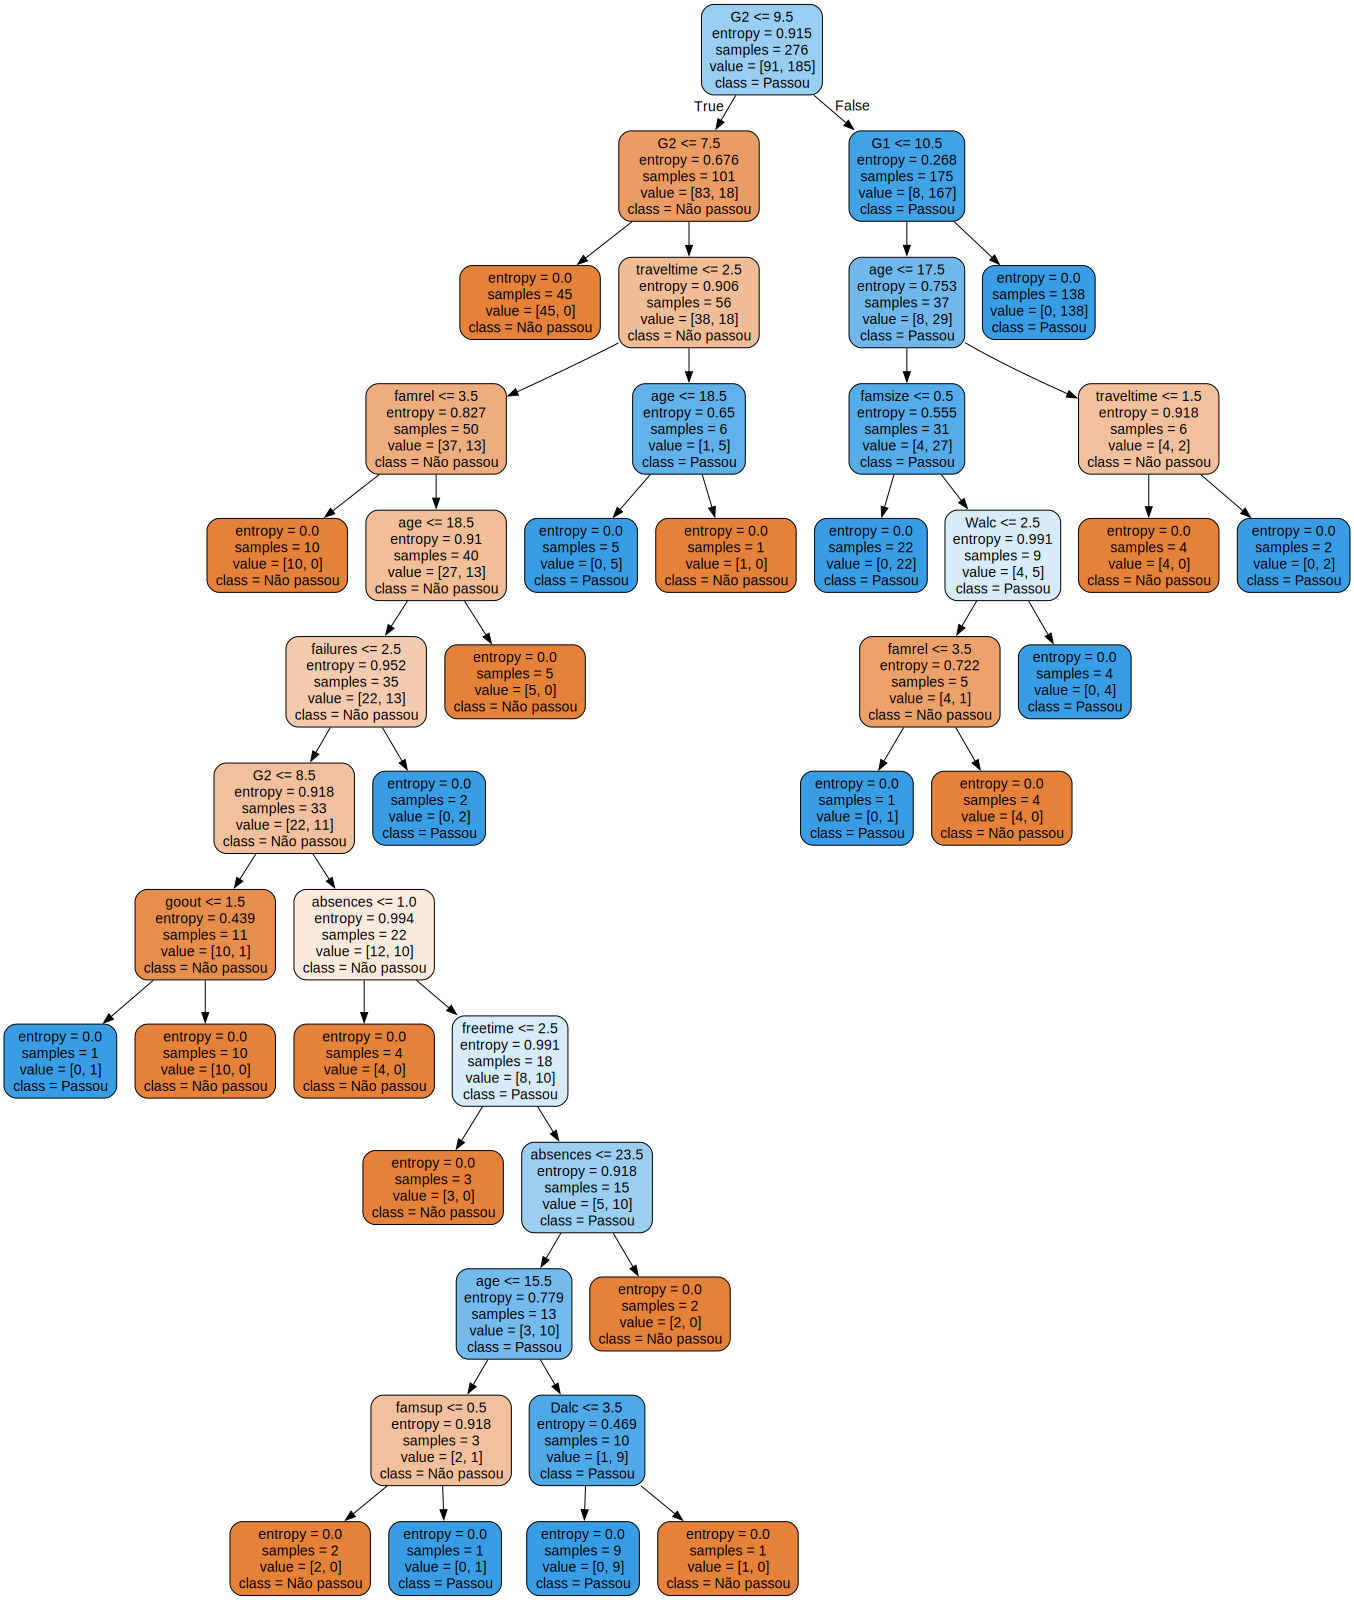

In [7]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from graphviz import Source


graph = export_graphviz(clf,
                        out_file=None,
                        feature_names=X.columns,
                        class_names=['Não passou', 'Passou'],
                        filled=True,
                        rounded=True)

Source(graph)

In [8]:
import pydotplus
from IPython.display import Image
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"10,10!"')
Image(pydot_graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

## 2.&nbsp; random forest

### 2.1.&nbsp;Vamos começar por importar os packages e o dataset

In [10]:
# packages gerais
import pandas as pd
import numpy as np

# dataset
df_car_price = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/CarPrice_Assignment.csv")

In [11]:
# exploração inicial
df_car_price.head()
# df_car_price.info()
# df_car_price.shape
# df_car_price.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### 2.2.&nbsp;Vamos visualizar a informação


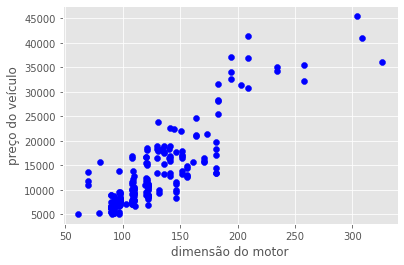

In [12]:
# importamos o matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#definimos as variáveis que queremos visualizar (enginesize e price)
x_variable = df_car_price["enginesize"]
y_variable = df_car_price["price"]
plt.scatter(x_variable, y_variable, color = 'b')
plt.ylabel("preço do veículo")
plt.xlabel('dimensão do motor')
plt.show()

### 2.3.&nbsp;Vamos aplicar o modelo de regressão

In [13]:
# definimos a variável alvo
target_variable = "price"

# train_test split usando a função train_test_split
# -> não consideramos stratification

X = df_car_price.drop([target_variable], axis = 1)
y = df_car_price[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12)


In [14]:
# importamos o modelo
from sklearn.linear_model import LinearRegression
lin_reg_all = LinearRegression()
lin_reg_all.fit(X_train, y_train)
y_pred = lin_reg_all.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
lin_reg_all.score(X_test, y_test) #R2

0.7652543959303266

### 2.4.&nbsp;Vamos aplicar o modelo de random forest

In [15]:
# importamos o modelo
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, max_features = 'sqrt', oob_score = True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
rf.oob_score_
rf.score(X_test, y_test) #R2


0.9142922728242932

### 2.6.&nbsp;Vamos visualizar os resultados

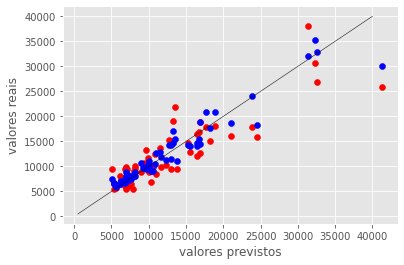

In [16]:
# vamos visualizar o resultado
plt.scatter(y_test, y_pred, color = 'r')
plt.scatter(y_test, y_pred_rf, color = 'b')
plt.plot([500, 40000],[500, 40000], color = 'k', linewidth = 0.5)
plt.ylabel("valores reais")
plt.xlabel('valores previstos')
plt.show()